In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import random
import scipy.stats
import math
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"szczescie_pkb.csv")
df = df.dropna()
df = df.reset_index()

In [3]:
happiness = df["happines_score"]
gdp = df["gdp_per_capita"]

# Analiza jednowymiarowa zmiennej zależnej oraz zmiennej niezależnej

## wizualizacja danych

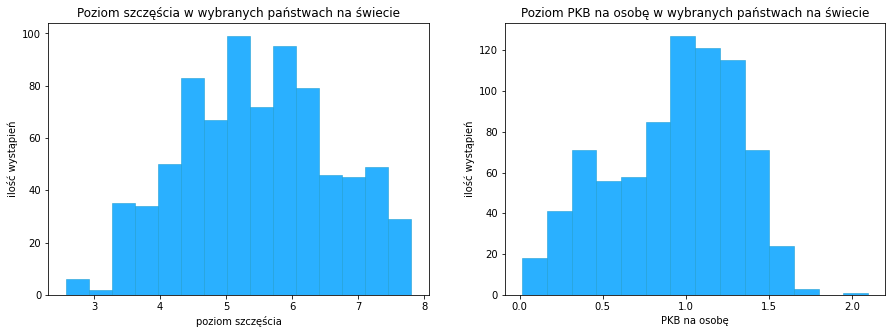

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.hist(happiness, bins = 15, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax1.set_xlabel("poziom szczęścia")
ax1.set_ylabel("ilość wystąpień")
ax1.set_title("Poziom szczęścia w wybranych państwach na świecie")

ax2.hist(gdp, bins = 14, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax2.set_xlabel("PKB na osobę")
ax2.set_ylabel("ilość wystąpień")
ax2.set_title("Poziom PKB na osobę w wybranych państwach na świecie")

plt.savefig('hist.pdf', format='pdf')

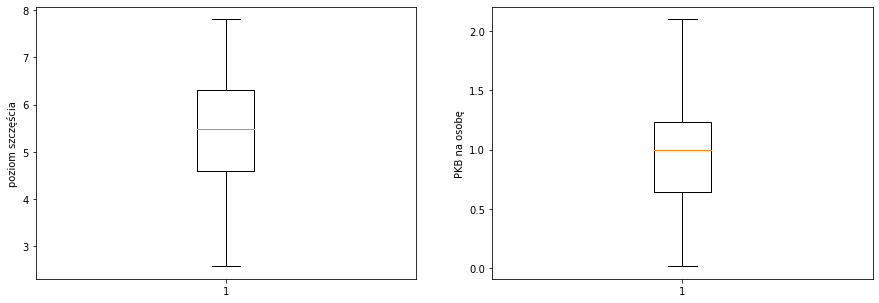

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.boxplot(happiness)
ax1.set_ylabel("poziom szczęścia")

ax2.boxplot(gdp)
ax2.set_ylabel("PKB na osobę")

plt.savefig('box.pdf', format='pdf')

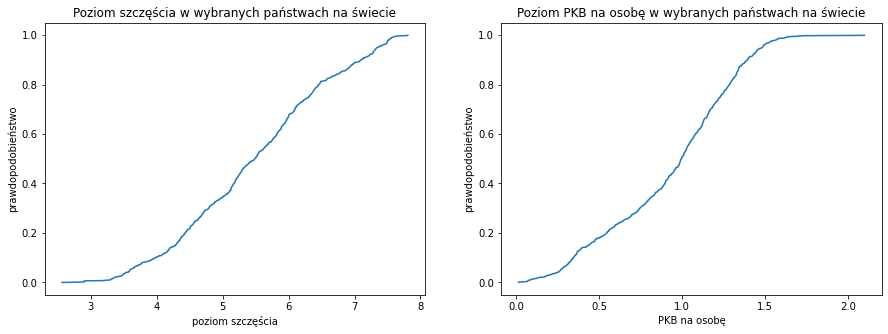

In [32]:
happiness_x = np.sort(happiness)
happiness_y = np.arange(len(happiness_x))/float(len(happiness_x))
gdp_x = np.sort(gdp)
gdp_y = np.arange(len(gdp_x))/float(len(gdp_x))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(happiness_x, happiness_y)
ax1.set_xlabel("poziom szczęścia")
ax1.set_ylabel("prawdopodobieństwo")
ax1.set_title("Poziom szczęścia w wybranych państwach na świecie")

ax2.plot(gdp_x,gdp_y)
ax2.set_xlabel("PKB na osobę")
ax2.set_ylabel("prawdopodobieństwo")
ax2.set_title("Poziom PKB na osobę w wybranych państwach na świecie")

plt.savefig('distr.pdf', format='pdf')

## Miary

### położenia

In [7]:
[np.mean(happiness),np.mean(gdp)] # średnia arytmetyczna

[5.475456508927938, 0.9303918053994947]

In [8]:
[statistics.harmonic_mean(happiness), statistics.harmonic_mean(gdp)] # średnia harmoniczna

[5.230075729883818, 0.5863798408943933]

In [9]:
[sp.stats.mstats.gmean(happiness),sp.stats.mstats.gmean(gdp)] # średnia geometryczna

[5.355272629738088, 0.8123785755984831]

In [10]:
[sp.stats.trim_mean(happiness, 0.1),sp.stats.trim_mean(gdp, 0.1)] # średnia ucinana 10%

[5.47725197357188, 0.9461849325150079]

In [11]:
[np.median(happiness),np.median(gdp)] # mediana

[5.4879999999999995, 0.995538592]

In [12]:
qw_hap = []
qw_gdp = []

qw_hap.append(np.quantile(happiness, 0.25))
qw_hap.append(np.quantile(happiness, 0.5))
qw_hap.append(np.quantile(happiness, 0.75))

qw_gdp.append(np.quantile(gdp, 0.25))
qw_gdp.append(np.quantile(gdp, 0.5))
qw_gdp.append(np.quantile(gdp, 0.75))

print(qw_hap,qw_gdp) #kwartyle

[4.599999901, 5.4879999999999995, 6.301] [0.6454459294999999, 0.995538592, 1.2287850000000002]


### rozproszenia

In [13]:
[max(happiness) - min(happiness), max(gdp) - min(gdp)] # rozstęp

[5.24180007, 2.0807]

In [14]:
[qw_hap[2] - qw_hap[0],qw_gdp[2] - qw_gdp[0]] # IQR = Q3 - Q1

[1.7010000989999998, 0.5833390705000003]

In [15]:
[statistics.variance(happiness),statistics.variance(gdp)] # wariancja nieobciążona

[1.262955820839609, 0.14791564146534145]

In [16]:
[math.sqrt(statistics.variance(happiness)),math.sqrt(statistics.variance(gdp))] # DX nieobciążone

[1.123813072018478, 0.3845980258209101]

In [17]:
[math.sqrt(statistics.variance(happiness))/np.mean(happiness) * 100,math.sqrt(statistics.variance(gdp))/np.mean(gdp) * 100] # współczynnik zmienności

[20.52455480535839, 41.33721122530417]

### spłaszczenia

In [18]:
[sp.stats.kurtosis(np.array(happiness), fisher=False, axis=0), sp.stats.kurtosis(np.array(gdp), fisher=False, axis=0)] #kurtoza

[2.2549699255949824, 2.3135878098139697]

### skośności

In [19]:
[sp.stats.skew(happiness, axis=None, bias=False), sp.stats.skew(gdp, axis=None, bias=False)] # skośność

[-0.01412769100363839, -0.3602304575155036]

# Analiza zależności liniowej pomiędzy zmienną zależną a zmienną niezależną

## prezentacja danych (wykres rozproszenia) i określenie zależności

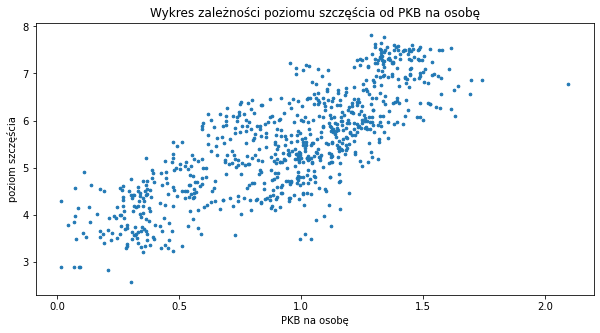

In [20]:
plt.figure(figsize = (10,5))
plt.scatter(gdp,happiness,s=7)
plt.xlabel("PKB na osobę")
plt.ylabel("poziom szczęścia")
plt.title("Wykres zależności poziomu szczęścia od PKB na osobę")

plt.savefig('plot1.pdf', format='pdf')

## estymacja współczynników w klasycznym modelu regresji (estymacja punktowa oraz estymacja przedziałowa)

In [21]:
def mnk(dane_x, dane_y):

    n = len(dane_x)
    x_avg = sum(dane_x)/n
    sx = np.sqrt(sum([(i-x_avg)**2 for i in dane_x])/(n-1))

    y_avg = sum(dane_y)/n
    sy = np.sqrt(sum([(i-y_avg)**2 for i in dane_y])/(n-1))

    r = sum([(dane_x[i]-x_avg)*(dane_y[i]-y_avg) for i in range(n)])/(sx*sy*(n-1))

    a = r*sy/sx
    b = y_avg - a*x_avg

    return a, b

In [22]:
b1, b0 = mnk(np.array(gdp),np.array(happiness))

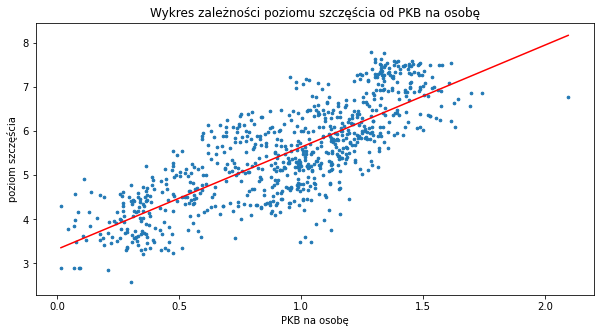

In [23]:
plt.figure(figsize = (10,5))
plt.scatter(gdp,happiness,s=7)
plt.xlabel("PKB na osobę")
plt.ylabel("poziom szczęścia")
plt.title("Wykres zależności poziomu szczęścia od PKB na osobę")
x = np.linspace(min(gdp), max(gdp), 1000)
y = [b1*i + b0 for i in x]
plt.plot(x,y, color="r")

plt.savefig('plot2.pdf', format='pdf')

## ocena poziomu zależności (współczynnik korelacji Pearsona, SST, SSE, SSR)

## predykcja oraz przedziały ufności dla pewnej części danych

# Analiza residuów

## sprawdzenie założeń: średnia równa zero, stała wariancja, niezależność residuów, rozkład normalny

In [24]:
residuals = [happiness[i]-(b1*gdp[i] + b0) for i in range(len(gdp))]

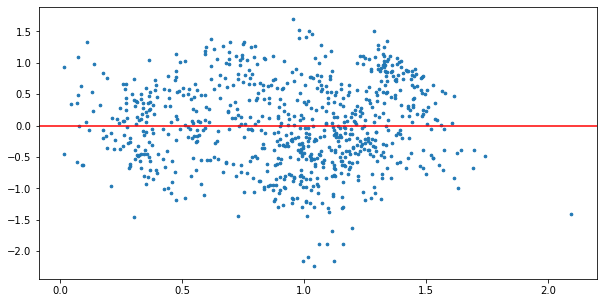

In [25]:
plt.figure(figsize = (10,5))
plt.scatter(gdp,residuals,s=7)
plt.axhline(0,color = "r")

plt.savefig('res.pdf', format='pdf')

In [26]:
np.mean(residuals)   # wartość oczekiwana  ≈ 0

1.8302538863605616e-15

In [27]:
np.var(residuals) # widzimy na wykresie że jest mniej więcej stała

0.46871371925745203

In [28]:
stat, p_value = scipy.stats.levene(random.sample(residuals,350),random.sample(residuals,350))
if p_value > 0.05:
    print("Wariancja jest raczej stała.")
else:
    print("Wariancja raczej nie jest stała.")

Wariancja jest raczej stała.


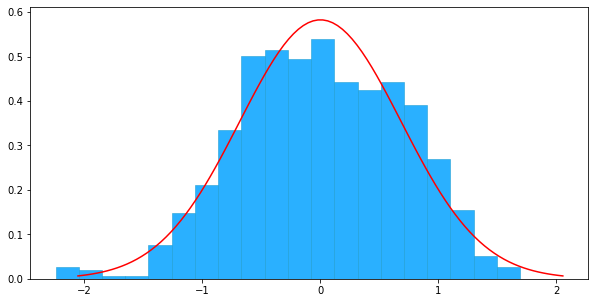

In [29]:
plt.figure(figsize = (10,5)) # sprawdzamy czy rozkład residuuów jest rozkładem normalnum
plt.hist(residuals, bins=20, density=True, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
mu, std = np.mean(residuals), np.std(residuals)
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, std), "r")

plt.savefig('res_hist.pdf', format='pdf')

In [30]:
stat, p = scipy.stats.normaltest(residuals)

if p > 0.05:
    print('Dane z rozkładu normalnego')
else:
    print('Dane nie pochodzą z rozkładu normalnego')

Dane nie pochodzą z rozkładu normalnego
